# Business Understanding

## Overview



The Paris Olympics is a global sporting event that has garnered significant attention and engagement across various social media platforms. Analyzing public sentiment regarding the Olympics can provide valuable insights into how athletes, countries and the overall event are perceived. This analysis can benefit sports organizations, media outlets, sponsors offering feedback on public perception, performance and engagement levels thus helping to tailor content and marketing strategies. Sentiment analysis can also benefit city officials to improve planning and address concerns such as health and sanitation.
The goal of this project is to perform a comprehensive sentiment analysis of social media content related to this year's Paris Olympics to understand public sentiment, identify emerging trends and provide a comprehensive understanding of how different aspects of the Olympics resonate with audiences worldwide.

## Problem Statement



The Paris Olympics is a high-profile event that generates a substantial volume of unstructured social media data that reflects public sentiment. The challenge lies in effectively analyzing this vast and diverse stream of data while also tackling challenges such as language differences, sentiment variations and contextual meanings in order to provide accurate and actionable insights.

## Proposed Solutions



1.	Use API access to collect data from major social media platforms and ensure compliance with platform policies and data protection regulations.
2.	Implement text normalization, tokenization and content filtering while utilizing language detection and translation tools for multilingual data handling.
3.	Employ advanced natural language processing models like BERT or GPT for sentiment classification incorporating sarcasm detection and contextual analysis for improved accuracy.
4.	Create an interactive dashboard using Tableau to display sentiment trends and insights with features for data filtering and exploring different aspects of the data.

## Objectives




### Main Objective
Develop a comprehensive social media sentiment analysis model that accurately captures and interprets public sentiment about the Paris Olympics from social media data.

### Specific Objectives
1.	To extract, preprocess and clean social media data from multiple platforms addressing quality issues and handling multilingual content related to the Paris Olympics.
2.	To develop and train advanced natural language processing models to accurately classify sentiments incorporating techniques to handle sarcasm and contextual nuances.
3.	To create interactive visualizations to display sentiment trends and key events providing actionable insights to stakeholders based on comprehensive analysis of public opinions.

## Success Metrics



- Accuracy – The proportion of correctly classified sentiments (positive, negative, neutral) out of all sentiments predicted by the model.
85% - 90%

- Precision -  The proportion of true positive sentiment predictions (correctly identified positive tweets) out of all predicted positives.
80% - 90% for both positive and negative sentiment classes.
75% - 85% for the neutral class.

- Recall - The proportion of true positive sentiment predictions out of all actual positives.
75% - 80% for all sentiment classes.

- F1 Score - The harmonic mean of Precision and Recall that provides a single metric that balances both precision and recall.
0.75 to 0.85

- Area Under the Curve - Receiver Operating Characteristic (AUC-ROC) - Measures how well a model distinguishes between classes. > 0.85

## Challenges


- Social media data is noisy and unstructured presenting challenges for accurate analysis.
- Distinguishing between positive, negative and neutral sentiments can be difficult especially when dealing with multilingual content thus affecting sentiment analysis accuracy
- The volume of social media posts and comments can be overwhelming particularly during major events like the Olympics. Managing and processing large volumes of real-time data necessitates efficient data handling and processing techniques.
- Interpreting context and sarcasm an extra layer of complexity as the sentiment expressed may not always align with the literal meaning of the words used. Social media content often includes informal language, slang and nuanced expressions that can skew sentiment analysis

## Conclusion



This sentiment analysis project aims to deliver a comprehensive understanding of public opinion about the Paris Olympics by leveraging social media data. By addressing the challenges of data quality, sentiment accuracy, multilingual content and implementing advanced NLP techniques, the project will provide actionable insights to the aforementioned stakeholders. Successful execution will enable better engagement strategies and enhance the overall experience of the Olympics for audiences worldwide.

## DATA UNDERSTANDING




### Data Sources
1.	APIs - Extract data from social media sites such as Twitter, Facebook and Instagram in the form of posts, tweets, comments and hashtags using their respective APIs.
The focus will be on posts mentioning Paris Olympics, relevant hashtags and location-based data.

2.	Web Scraping - Extract additional data from comments and discussions from news sites and sports forums such as ESPN and Sports Center

### Datasets



1.	Social media data in the form of tweets, facebook and Instagram posts and comments mentioning the Paris Olympics.
2.	News articles, comments and replies discussing the various aspects of the Olympics.

### Relevance of The Data



>The data sources and datasets identified for this project are highly relevant to analyzing public sentiment surrounding the Paris Olympics. Social media platforms like Twitter, Facebook and Instagram capture immediate reactions, discussions and emotional responses from a global audience thus providing a rich source of unfiltered public sentiment.
The inclusion of location-based data and relevant hashtags allows for more targeted analysis potentially revealing geographical trends and topic-specific sentiments. Complementing this with web scraping of news sites and sports forums like ESPN and Sports Center adds depth to the analysis by incorporating more structured discussions and content.
This combination of data sources offers a comprehensive view of public sentiment ranging from spontaneous reactions on social media to more considered opinions in news comment sections and sports forums.

#### Python Modules Importation

In [2]:
import nltk
# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
# import necessary modules
# manupulation
import pandas as pd
import os
import numpy as np

# nltk
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer


# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#### Combining CSV Files

In [ ]:
# Folder in which the csv files are found
folder_path = 'X_data'

# List of all the csv files found in the folder
csv_files = [fil for fil in os.listdir(folder_path) if fil.endswith('.csv')]

# Create an empty list to store DataFrames
data_frames = []

# Loop through the list of CSV files and read each one into a DataFrame
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    data_frames.append(df)

# Concatenate all DataFrames into one (stack vertically)
merged_df = pd.concat(data_frames, ignore_index=True, sort=False)

merged_df.info()

# Save the concatenated DataFrame to a new CSV file
new_df = '2024-olympics-sentiments.csv'
merged_df.to_csv(new_df, index=False)
# print(f'merged CSV file saved as {output_file}')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12888 entries, 0 to 12887
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category                  12888 non-null  object
 1   Keyword                   12888 non-null  object
 2   Web_Page_URL              12888 non-null  object
 3   Tweet_Website             12888 non-null  object
 4   Author_Name               12875 non-null  object
 5   Author_Web_Page_URL       12888 non-null  object
 6   Tweet_Timestamp           12258 non-null  object
 7   Tweet_Content             12884 non-null  object
 8   Tweet_Image_URL           6505 non-null   object
 9   Tweet_Video_URL           12888 non-null  object
 10  Tweet_AD                  12888 non-null  bool  
 11  Tweet_Number_of_Reviews   9161 non-null   object
 12  Tweet_Number_of_Retweets  10879 non-null  object
 13  Tweet_Number_of_Likes     12116 non-null  object
 14  Tweet_Number_of_Looks 

In [4]:
class DataUnderstanding():
    """Class that provides an understanding of a dataset"""

    def __init__(self, data=None):
        """Initialization"""
        self.df = data

    def load_data(self, path):
        """Load the data"""
        if self.df is None:
            self.df = pd.read_csv(path, encoding='latin-1')
        return self.df

    def understanding(self):
        """Provides insights into the dataset"""
        # Info
        print("INFO")
        print("-" * 4)
        self.df.info()

        # Shape
        print("\n\nSHAPE")
        print("-" * 5)
        print(f"Records in dataset: {self.df.shape[0]} with {self.df.shape[1]} columns.")

        # Columns
        print("\n\nCOLUMNS")
        print("-" * 6)
        print("Columns in the dataset are:")
        for idx in self.df.columns:
            print(f"- {idx}")

        # Unique Values
        print("\n\nUNIQUE VALUES")
        print("-" * 12)
        for col in self.df.columns:
            print(f"Column {col} has {self.df[col].nunique()} unique values")
            if self.df[col].nunique() < 12:
                print(f"Top unique values in {col} include:")
                for idx in self.df[col].value_counts().index:
                    print(f"- {idx}")
            print("")

        # Missing or Null Values
        print("\nMISSING VALUES")
        print("-" * 15)
        for col in self.df.columns:
            print(f"Column {col} has {self.df[col].isnull().sum()} missing values.")

        # Duplicate Values
        print("\n\nDUPLICATE VALUES")
        print("-" * 16)
        print(f"The dataset has {self.df.duplicated().sum()} duplicated records.")


In [5]:
# Create an instance of DataCleaning
data =  DataUnderstanding()

# Load the data (replace with your actual file path)
data_path = '2024-olympics-sentiments.csv'
df = data.load_data(data_path)
df

,Category,Keyword,Web_Page_URL,Tweet_Website,Author_Name,Author_Web_Page_URL,Tweet_Timestamp,Tweet_Content,Tweet_Image_URL,Tweet_Video_URL,Tweet_AD,Tweet_Number_of_Reviews,Tweet_Number_of_Retweets,Tweet_Number_of_Likes,Tweet_Number_of_Looks
0,TopPost,#olympics2024,https://twitter.com/search?q=#olympics2024&src...,https://twitter.com/Mapasexy/status/1821618461...,Mapaseka MakhanyaReload,https://twitter.com/Mapasexy,2024-08-08,He Said #Olympics2024,NaN,https://twitter.com/Mapasexy/status/1821618461...,False,15,508,778,35K
1,TopPost,#olympics2024,https://twitter.com/search?q=#olympics2024&src...,https://twitter.com/MuzalaSamukonga/status/182...,Muzala Samukonga,https://twitter.com/MuzalaSamukonga,2024-08-08,ZAMBIA KU CHALO Thank you very much heavenly f...,https://pbs.twimg.com/media/GUev1F8WYAA2jYD?fo...,https://twitter.com/MuzalaSamukonga/status/182...,False,24,222,916,9.3K
2,TopPost,#olympics2024,https://twitter.com/search?q=#olympics2024&src...,https://twitter.com/gondo_nicole/status/182162...,Nicole GReload,https://twitter.com/gondo_nicole,2024-08-08,This was an African competition. Well done Afr...,NaN,https://twitter.com/gondo_nicole/status/182162...,False,NaN,NaN,1,93
3,TopPost,#olympics2024,https://twitter.com/search?q=#olympics2024&src...,https://twitter.com/malinga_ninety9/status/182...,Lasith Malinga,https://twitter.com/malinga_ninety9,2024-08-08,A huge applause to Arshad Nadeem and Neeraj Ch...,NaN,https://twitter.com/malinga_ninety9/status/182...,False,17,71,673,4.2K
4,TopPost,#olympics2024,https://twitter.com/search?q=#olympics2024&src...,https://twitter.com/LanceUlanoff/status/182018...,Lance UlanoffReload,https://twitter.com/LanceUlanoff,2024-08-04,Wow. Just wow. Noah Lyles wins by microns. #ol...,https://pbs.twimg.com/media/GUKbi3pWAAAf-qt?fo...,https://twitter.com/LanceUlanoff/status/182018...,False,1,4,19,38K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12883,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/Linus2k/status/88563519166...,Doctor Linus,https://twitter.com/Linus2k,2017-07-13,Il mio augurio Ã¨ che #Paris2024 sia un IMMENS...,NaN,https://twitter.com/Linus2k/status/88563519166...,False,3,9,23,NaN
12884,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/ambafrancejp_jp/status/885...,ãã©ã³ã¹å¤§ä½¿é¤¨,https://twitter.com/ambafrancejp_jp,2017-07-14,ä»å¹´ããã©ã³ã¹å¤§ä½¿å ¬é¸ã«ã¦ããã...,https://pbs.twimg.com/media/DEsHE_OVoAEN27M?fo...,https://twitter.com/ambafrancejp_jp/status/885...,False,1,47,98,NaN
12885,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/rubencronicas/status/88602...,RUBÃN HERNÃNDEZ,https://twitter.com/rubencronicas,2017-07-15,#Paris2024 @ClubFrance @FranciaenMexico @MX_Fr...,https://pbs.twimg.com/media/DEvMASzVYAAvZeb?fo...,https://twitter.com/rubencronicas/status/88602...,False,NaN,4,5,NaN
12886,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/marcos_z/status/8848591646...,Marcos ZugastiReloadParis 2024,https://twitter.com/marcos_z,2017-07-11,Bancando los trapos. #Paris2024,NaN,https://twitter.com/marcos_z/status/8848591646...,False,NaN,4,8,NaN


In [6]:

# Get an understanding of the dataset
data.understanding()

INFO
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12888 entries, 0 to 12887
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category                  12888 non-null  object
 1   Keyword                   12888 non-null  object
 2   Web_Page_URL              12888 non-null  object
 3   Tweet_Website             12888 non-null  object
 4   Author_Name               12875 non-null  object
 5   Author_Web_Page_URL       12888 non-null  object
 6   Tweet_Timestamp           12258 non-null  object
 7   Tweet_Content             12884 non-null  object
 8   Tweet_Image_URL           6505 non-null   object
 9   Tweet_Video_URL           12888 non-null  object
 10  Tweet_AD                  12888 non-null  bool  
 11  Tweet_Number_of_Reviews   9161 non-null   object
 12  Tweet_Number_of_Retweets  10879 non-null  object
 13  Tweet_Number_of_Likes     12116 non-null  object
 14  Tweet_Number

In [7]:
# Create an instance of DataUnderstanding
data = DataUnderstanding()

# Load the dataset
data_path = data.load_data(path="2024-olympics-sentiments.csv")

# Display the first five rows of the dataset
print(data_path.head())

# Get an understanding of the dataset
data.understanding()




  Category        Keyword                                       Web_Page_URL  \
0  TopPost  #olympics2024  https://twitter.com/search?q=#olympics2024&src...   
1  TopPost  #olympics2024  https://twitter.com/search?q=#olympics2024&src...   
2  TopPost  #olympics2024  https://twitter.com/search?q=#olympics2024&src...   
3  TopPost  #olympics2024  https://twitter.com/search?q=#olympics2024&src...   
4  TopPost  #olympics2024  https://twitter.com/search?q=#olympics2024&src...   

                                       Tweet_Website              Author_Name  \
0  https://twitter.com/Mapasexy/status/1821618461...  Mapaseka MakhanyaReload   
1  https://twitter.com/MuzalaSamukonga/status/182...         Muzala Samukonga   
2  https://twitter.com/gondo_nicole/status/182162...           Nicole GReload   
3  https://twitter.com/malinga_ninety9/status/182...           Lasith Malinga   
4  https://twitter.com/LanceUlanoff/status/182018...      Lance UlanoffReload   

                   Author_Web_Pa

## Data Cleaning

### Processes of Data Cleaning
- Dropping columns that are Irrelevant our analysis
- Removing duplicates
- Removing Null Values
- Stripping white spaces off the column names
- Convert the TweetTimestamp column into a datetime format

In [8]:
import pandas as pd

class DataCleaning(DataUnderstanding):
    """This class is used for data cleaning"""

    def drop_columns(self, columns):
        """Drop specified columns"""
        print(f"Dropping Columns: {columns}")
        self.df.drop(columns=columns, inplace=True)

    def remove_duplicates(self):
        """Remove duplicates and print the number of duplicates removed"""
        num_duplicates_before = self.df.duplicated().sum()
        self.df.drop_duplicates(inplace=True)
        num_duplicates_after = self.df.duplicated().sum()
        print(f"Number of duplicates removed: {num_duplicates_before - num_duplicates_after}")

    def drop_nulls(self):
        """Drop rows with any null values and print the number of rows dropped"""
        num_rows_before = self.df.shape[0]
        self.df.dropna(inplace=True)
        num_rows_after = self.df.shape[0]
        print(f"Number of rows with null values dropped: {num_rows_before - num_rows_after}")

    def strip_column_names(self):
        """Strip whitespace from column names"""
        print("Stripping whitespace from column names")
        self.df.columns = self.df.columns.str.strip()

    def convert_to_datetime(self, column_name):
        """Convert a column to datetime format"""
        self.df[column_name] = pd.to_datetime(self.df[column_name])

    def filter_year(self, column_name, year):
        """Filter rows based on a specific year"""
        self.df = self.df[self.df[column_name].dt.year == year]

# Create an instance of DataCleaning
cleaner = DataCleaning()

# Load the data (replace with your actual file path)
data_path = '2024-olympics-sentiments.csv'
df = cleaner.load_data(data_path)

# Perform data cleaning
# Drop irrelevant columns
irrelevant_columns = ['Tweet_Image_URL', 'Web_Page_URL', 'Author_Web_Page_URL', 'Author_Name',
                      'Tweet_Video_URL', 'Tweet_AD', 'Tweet_Website', 'Tweet_Number_of_Reviews']
cleaner.drop_columns(irrelevant_columns)

# Remove duplicates and print the number removed
cleaner.remove_duplicates()

# Drop rows with null values and print the number removed
cleaner.drop_nulls()

# Strip column names of any leading/trailing whitespace
cleaner.strip_column_names()

# Convert 'Tweet_Timestamp' to datetime format
cleaner.convert_to_datetime('Tweet_Timestamp')

# Filter data for the year 2024
cleaner.filter_year('Tweet_Timestamp', 2024)

# Print the cleaned DataFrame
df = cleaner.df
print(df.head())


Dropping Columns: ['Tweet_Image_URL', 'Web_Page_URL', 'Author_Web_Page_URL', 'Author_Name', 'Tweet_Video_URL', 'Tweet_AD', 'Tweet_Website', 'Tweet_Number_of_Reviews']
Number of duplicates removed: 3206
Number of rows with null values dropped: 3665
Stripping whitespace from column names
  Category        Keyword Tweet_Timestamp  \
0  TopPost  #olympics2024      2024-08-08   
1  TopPost  #olympics2024      2024-08-08   
3  TopPost  #olympics2024      2024-08-08   
4  TopPost  #olympics2024      2024-08-04   
5  TopPost  #olympics2024      2024-08-08   

                                       Tweet_Content Tweet_Number_of_Retweets  \
0                              He Said #Olympics2024                      508   
1  ZAMBIA KU CHALO Thank you very much heavenly f...                      222   
3  A huge applause to Arshad Nadeem and Neeraj Ch...                       71   
4  Wow. Just wow. Noah Lyles wins by microns. #ol...                        4   
5  Welp looks like the goaltender for

**Validity**

Irrelevant Data; data that is not actually needed, and doesn’t fit under the context of the problem we’re trying to solve

***Why columns the columns have been dropped***

- `Web_Page_URL`: Redundant with the Tweet_Website column, because it contains the same information.
- `Author_Web_Page_URL`: It would be useful if we would have wanted to understand the who is posting but our focus is in the sentimental analysis
- `Tweet_Image_URL`:Images are not essential for this analysis considering the column itself has 50% null values
- `Tweet_Video_URL`:video content is not essential for this analysis.
- `Tweet_AD`: This indicates whether the tweet is an ad, butwe are not analyzing advertisements
- `Tweet_Number_of_Reviews`: Has a lot of missing values


**Completeness**

Data completeness is the extent to which all required and expected data elements are present within a dataset, ensuring that no essential information is missing.It is crucial for accurate insights, as missing information can lead to incomplete analyses and flawed decision-making. Neglecting data completeness risks distorted conclusions and undermines the reliability of business strategies or research outcomes.

In [9]:
print(df.isna().sum().sum())


0


- Number of rows with null values dropped: 3665

**Consistency**

In [10]:
print(df.duplicated().sum())

0


Number of duplicates removed: 3206

### Text Cleaning

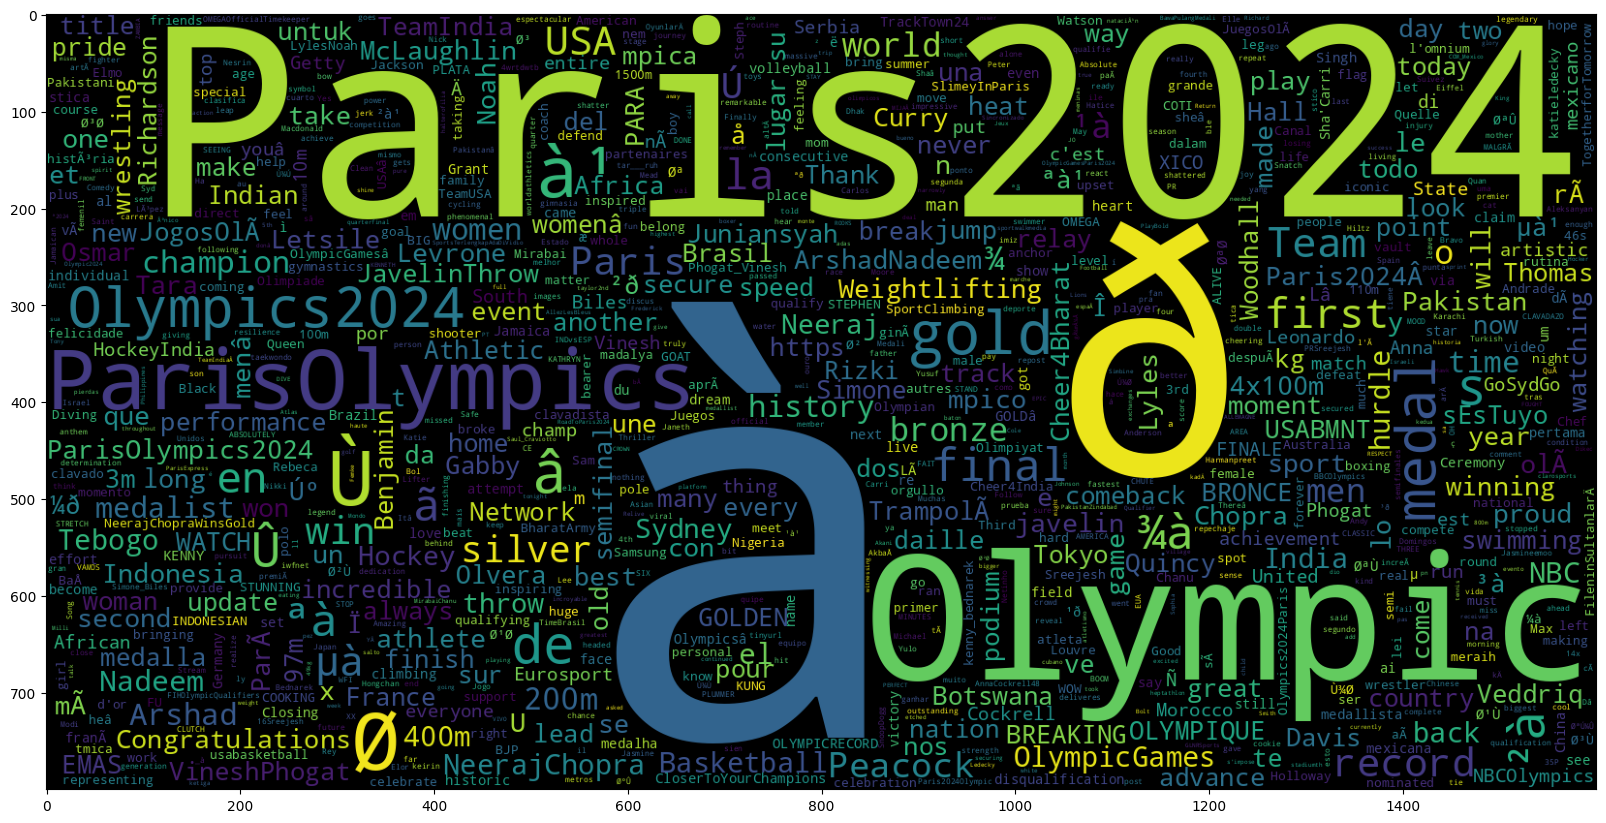

In [12]:
# ! pip install WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract processed text from your DataFrame
processedtext = df['Tweet_Content'].tolist()

# Use all processed text (up to the length of your dataset)
data_neg = processedtext[:len(processedtext)]

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.show()

In [13]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english') + ['sxsw', 'sxswi', 'link', 'rt'])
lemmatizer = WordNetLemmatizer()

def lemmatize_tweet(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (keep the text after the #)
    text = re.sub(r'#', '', text)
    # Remove special characters like "&quot;"
    text = re.sub(r'&\w+;', '', text)
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenize text
    tokens = re.split('\W+', text.lower())
    # Remove stopwords and lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Remove extra white spaces
    tokens = [word.strip() for word in tokens if word.strip() != '']
    # Remove numbers
    tokens = [word for word in tokens if not word.isdigit()]
    # Tag parts of speech
    pos_tags = nltk.pos_tag(tokens)
    # Filter tokens to retain only nouns, adjectives, verbs, and adverbs
    important_pos = {'NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'RB', 'RBR', 'RBS'}
    tokens = [word for word, tag in pos_tags if tag in important_pos]
    return tokens

# Apply the clean_text function to the 'tweet' column
df['lemmatized_tweet'] = df['Tweet_Content'].apply(lambda x: lemmatize_tweet(x))

def join_text(tokens):
    """
    This function takes a list of tokens (words) and returns them as a single string.
    Each token is separated by a space.

    Parameters:
    tokens (list of str): A list of tokens to be joined.

    Returns:
    str: The tokens joined into a single string separated by spaces.
    """
    return " ".join(tokens)

df['clean_tweet'] = df['lemmatized_tweet'].apply(lambda x: join_text(x))

# Print the cleaned tweets
df.head()

,Category,Keyword,Tweet_Timestamp,Tweet_Content,Tweet_Number_of_Retweets,Tweet_Number_of_Likes,Tweet_Number_of_Looks,lemmatized_tweet,clean_tweet
0,TopPost,#olympics2024,2024-08-08,He Said #Olympics2024,508,778,35K,"[said, olympics2024]",said olympics2024
1,TopPost,#olympics2024,2024-08-08,ZAMBIA KU CHALO Thank you very much heavenly f...,222,916,9.3K,"[zambia, ku, chalo, thank, much, heavenly, fat...",zambia ku chalo thank much heavenly father ill...
3,TopPost,#olympics2024,2024-08-08,A huge applause to Arshad Nadeem and Neeraj Ch...,71,673,4.2K,"[huge, applause, arshad, nadeem, neeraj, chopr...",huge applause arshad nadeem neeraj chopra brin...
4,TopPost,#olympics2024,2024-08-04,Wow. Just wow. Noah Lyles wins by microns. #ol...,4,19,38K,"[wow, wow, noah, lyles, win, micron, olympics2...",wow wow noah lyles win micron olympics2024
5,TopPost,#olympics2024,2024-08-08,Welp looks like the goaltender for Spainâs w...,1,7,1.4K,"[welp, look, goaltender, spainâ, womenâ, water...",welp look goaltender spainâ womenâ water polo ...


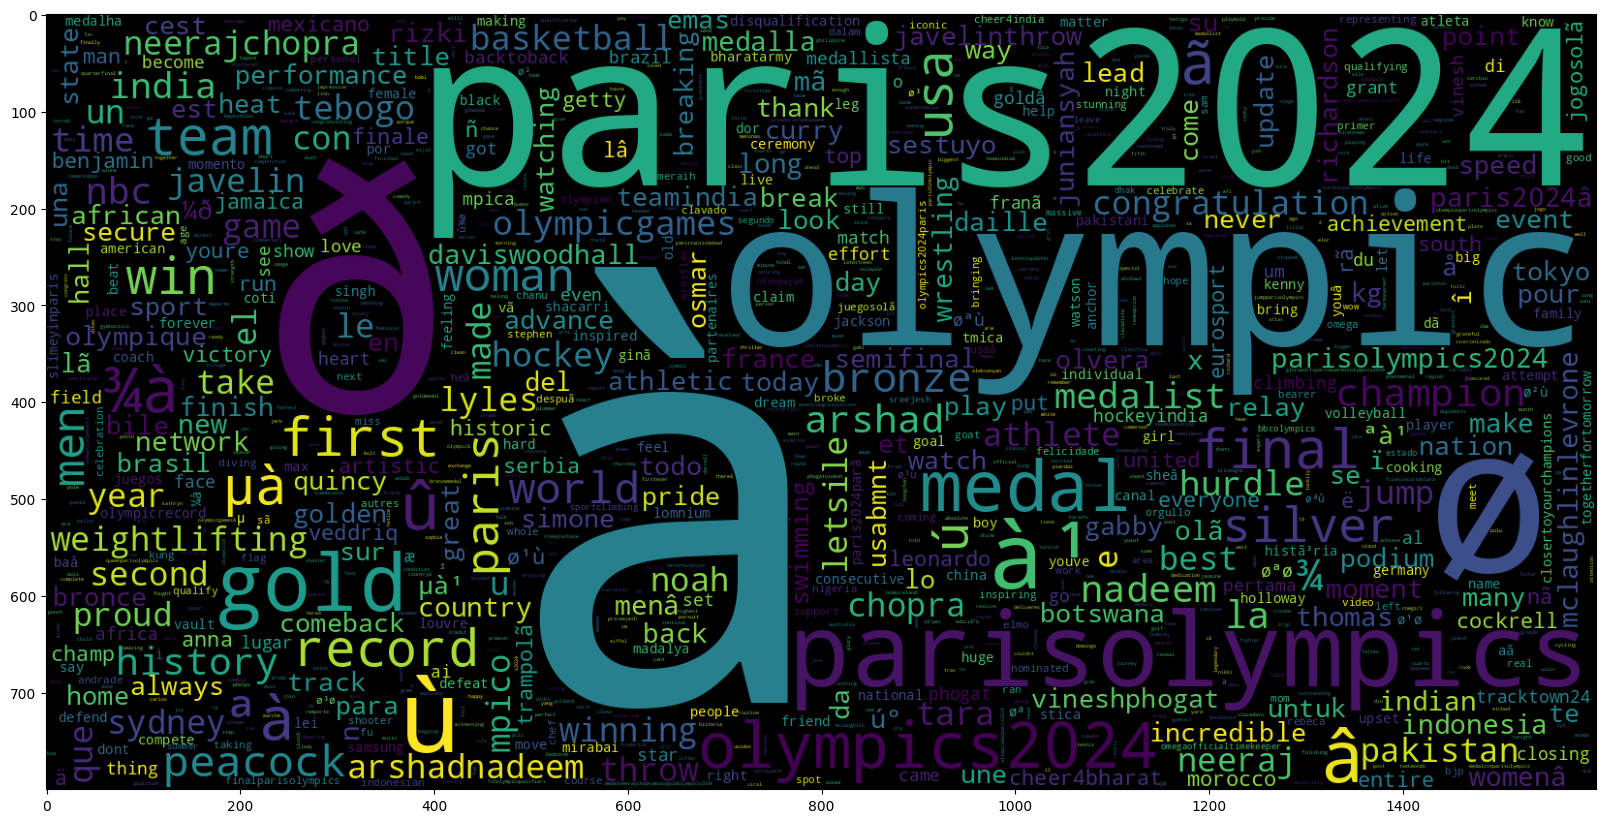

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract processed text from your DataFrame
processedtext = df['clean_tweet'].tolist()

# Use all processed text (up to the length of your dataset)
data_neg = processedtext[:len(processedtext)]

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.show()

In [163]:
# Save the DataFrame to a new CSV file
df.to_csv('cleaned-sentiments.csv', index=False)
